In [1]:
import cv2
import numpy as np
import os ,sys
import matplotlib.pyplot as plt
import warnings
import random
warnings.filterwarnings("ignore")


In [2]:
path = "/media/anand/polyglot/BraindataPY/"

In [3]:
def train_or_testset(x):
    yes = os.path.join(path,x,"yes/")
    no = os.path.join(path,x,"no/")
    dirlist = [no,yes]
    return dirlist
train_dirlist = train_or_testset("train/")       ####collecting training data


In [4]:
def show_file_details(directories):
    for dir in directories:
        print(len(os.listdir(dir)),"files in {}".format(dir.split("/")[-2]))
print("for train set")
show_file_details(train_dirlist)    

for train set
78 files in no
108 files in yes


In [5]:
test_dirlist = train_or_testset('test/')
print("for test set")####collecting testing data
show_file_details(test_dirlist)

for test set
20 files in no
47 files in yes


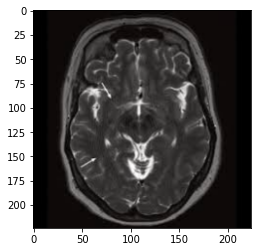

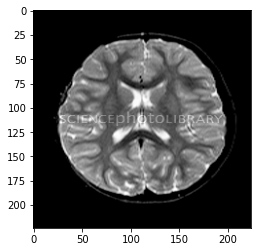

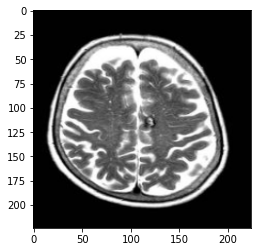

In [6]:
def display_image(directory,index):
    for file_name in os.listdir(directory[0])[:index]:
        image = cv2.imread(directory[0]+'/'+file_name)
        image = cv2.resize(image,(224,224))
        #image = cv2.imread(os.path.join(dirlist[0],file_name))
        plt.imshow(image)
        plt.show()
display_image(train_dirlist,3)
    

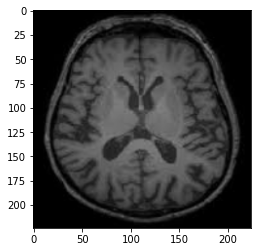

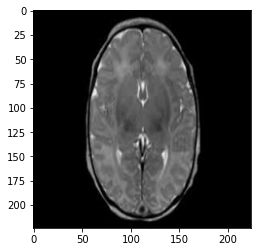

In [7]:
display_image(test_dirlist,2)

##### 

#### Here through a simple matplotlib plot we have figured out that pictures varied much in there regular pixel and size.

#### ========================================================== =============================

### Creating path, labels and image arrays for training dataset

In [18]:
label_dict = {"no":0, "yes":1}   ### To convert our labels to 1 or 0 values we can use this look up dict


def create_data_loader(dirlis,labellist,image_dtlst,image_pathlst):
    for files in dirlis:
        for j in os.listdir(files):
            image_path = os.path.join(files,j)
            labels = files.split("/")[-2]    ##Extracting labels
            #print(labels) 
            labellist.append(label_dict[labels])          ## appending labels
            file_path = os.path.join(files,j)
            image_pathlst.append(file_path)      ##Printing it
            #print(os.path.join(files,j))
            image = cv2.imread(image_path)
            image = cv2.resize(image,(224,224))
            image_array = np.array(image)   ## Its already a numpy array so we choose not to append this
            image_dtlst.append(image)
    print(len(labellist),":-sample label to show where actually it comes from",labels)
    print(len(image_pathlst),":-sample path to show where actually it comes from",image_path)
    print(len(image_dtlst))         #because rest is in test set  

In [19]:
label_train = []      ###declare a list for tracking target labels for training datas
images_train = []      ####assigning a list and storing image arrays of training images
image_paths_train = [] ###This is an optional step to keep a track on the train image datas path.
create_data_loader(train_dirlist,label_train,images_train,image_paths_train)        # dirlist[:-1] includes no and yes directories

186 :-sample label to show where actually it comes from yes
186 :-sample path to show where actually it comes from /media/anand/polyglot/BraindataPY/train/yes/Y99.JPG
186


In [20]:
label_test = []      ###declare a list for tracking target labels for testing datas
images_test = []      ####assigning a list and storing image arrays of testing images
image_paths_test = [] ###This is an optional step to keep a track on the test image datas path
create_data_loader(test_dirlist,label_test,images_test,image_paths_test)

67 :-sample label to show where actually it comes from yes
67 :-sample path to show where actually it comes from /media/anand/polyglot/BraindataPY/test/yes/Y9.jpg
67


In [21]:
print("train_set some samples") 
print(label_train[2])                             
print(images_train[2],images_train[2].shape)                             
print(image_paths_train[2])

train_set some samples
0
[[[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 ...

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]

 [[1 1 1]
  [1 1 1]
  [1 1 1]
  ...
  [1 1 1]
  [1 1 1]
  [1 1 1]]] (224, 224, 3)
/media/anand/polyglot/BraindataPY/train/no/N26.JPG


### shuffling training data as its the best practise before giving it to any ML model so we can prevent model from learning any series patterns

In [22]:
def shuffle_data(labelset,img_dataset,pathset):                                                     
    shuf_idx = [i for i in range(0,len(labelset))]    ##lst = [i for i in range(0,len(trainlbl))]                                                               
    labelset = np.array(labelset)                     ## random.shuffle(lst)
    img_dataset = np.array(img_dataset)               ## sett = trainlbl[lst]                                        
    pathset = np.array(pathset)                       ##  settpath = trainpath[lst]                                                                                     
    random.shuffle(shuf_idx)                          ##
    labelset = labelset[shuf_idx]
    img_dataset = img_dataset[shuf_idx]                                                         
    pathset = pathset[shuf_idx] 
    return labelset,img_dataset,pathset

##### creating shuffled set for train set

In [23]:
label_train,images_train,image_paths_train = shuffle_data(label_train,images_train,image_paths_train)

In [24]:
label_train[2:56]


array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1])

In [25]:
image_paths_train[0:8]

array(['/media/anand/polyglot/BraindataPY/train/no/no 8.jpg',
       '/media/anand/polyglot/BraindataPY/train/no/no 92.jpg',
       '/media/anand/polyglot/BraindataPY/train/yes/Y99.JPG',
       '/media/anand/polyglot/BraindataPY/train/no/46 no.jpg',
       '/media/anand/polyglot/BraindataPY/train/yes/Y192.JPG',
       '/media/anand/polyglot/BraindataPY/train/no/N15.jpg',
       '/media/anand/polyglot/BraindataPY/train/yes/Y86.JPG',
       '/media/anand/polyglot/BraindataPY/train/no/43 no.jpg'],
      dtype='<U53')

#### creatiing shuffled set for test set  (This is optional also not recommnended)

In [26]:
label_test,images_test,image_paths_test = shuffle_data(label_test,images_test,image_paths_test)

In [27]:
label_test[2:12]

array([1, 0, 1, 1, 0, 0, 1, 1, 1, 1])